<center><h1>Wine Quality Prediction</h1></center>

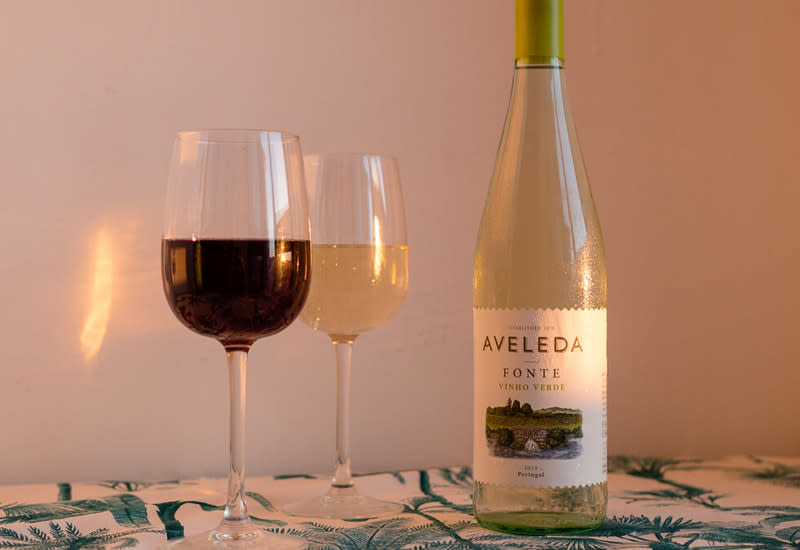

## by Noura El-Mamlouk


# Introduction

On the weekend, most of us prefer having a fancy dinner With our loved ones. While the kids define a fancy dinner as one that has pasta, adults like to add a cherry on top by having a classic glass of red wine along With the Italian dish. But when it comes to shopping for that wine bottle, a few of us get confused about which is the best one to buy. Few believe that the longer it has been fermented, the better it'll taste. Few suggest relatively sweeter wines are good quality wines. To know a precise answer, I built my wine Quality Predictor.

## prepare the libraries

In [71]:
!pip install xgboost

In [97]:
##Importing libraries##
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance

# 1.Data Wrangling


## General Properties


In [36]:
wine = pd.read_csv("winequalityN.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [37]:
wine.shape

(6497, 13)

In [38]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [39]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# 2.Data Cleaning and preprocessing

In [40]:
num_duplicates = wine.duplicated().sum()

In [41]:
wine = wine.drop_duplicates()
# Get the number of rows that were removed
num_removed = num_duplicates - wine.duplicated().sum()
print(f'{num_removed} duplicate rows removed.')

1168 duplicate rows removed.


In [43]:
wine = wine.dropna()
#check again
if wine.isnull().any().any():
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


In [44]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## encoding categorical variables

In [45]:
wine['type'].replace(['white','red'],[1,0], inplace=True)
wine['type'].value_counts()

1    3942
0    1353
Name: type, dtype: int64

In [46]:
wine['quality'].value_counts()

6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: quality, dtype: int64

In [47]:
# Define the bins and group names for the 'quality' column
bins = (2, 6, 9)
group_names = ['bad', 'good']
# Create a new column 'quality_group' and assign it the result of the 'pd.cut' function
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [48]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,bad


# 3) EDA (Explaratory Data Analysis)

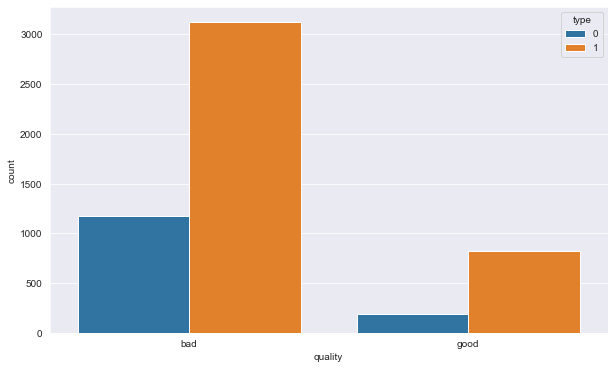

In [49]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x='quality', hue='type', data=wine)
plt.show()

don't forget that 1 for white 0 for red

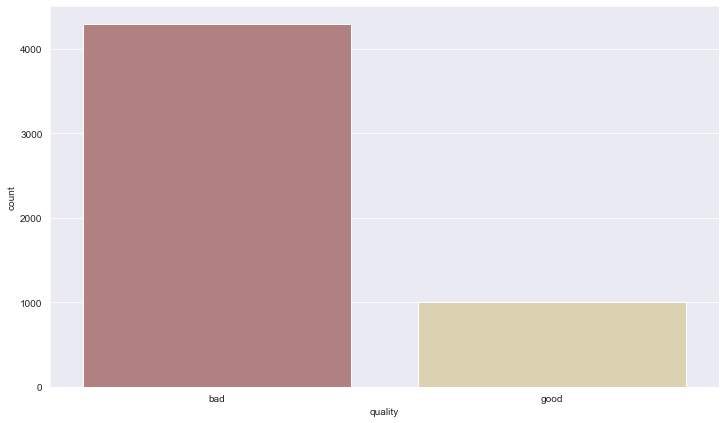

In [50]:
plt.figure(figsize=(12,7))
sns.countplot(x='quality', data=wine, palette='pink')
plt.show()

## how to use a histogram to show the distribution of multiple numerical columns in a dataset and how they relate to the 'quality'

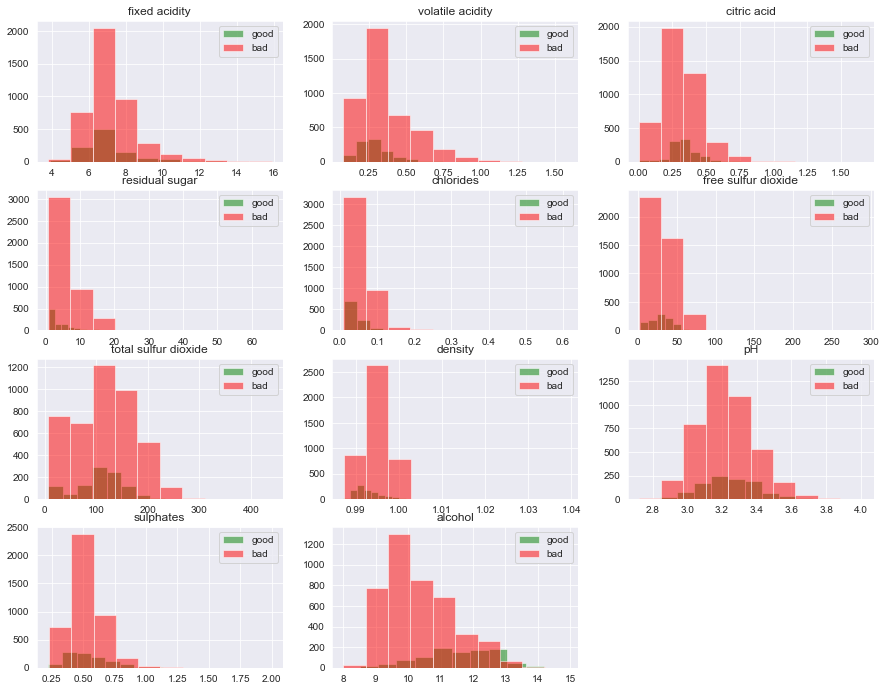

In [51]:
# Select the columns to plot
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Plot a histogram for each column
for i, col in enumerate(columns):
    wine[wine['quality']=='good'][col].hist(ax=axes[i], label='good', alpha=0.5, color='g')
    wine[wine['quality']=='bad'][col].hist(ax=axes[i], label='bad', alpha=0.5, color='r')
    axes[i].set_title(col)
    axes[i].legend()

# Remove the empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Show the plot
plt.show()

# Distributions & Normalization

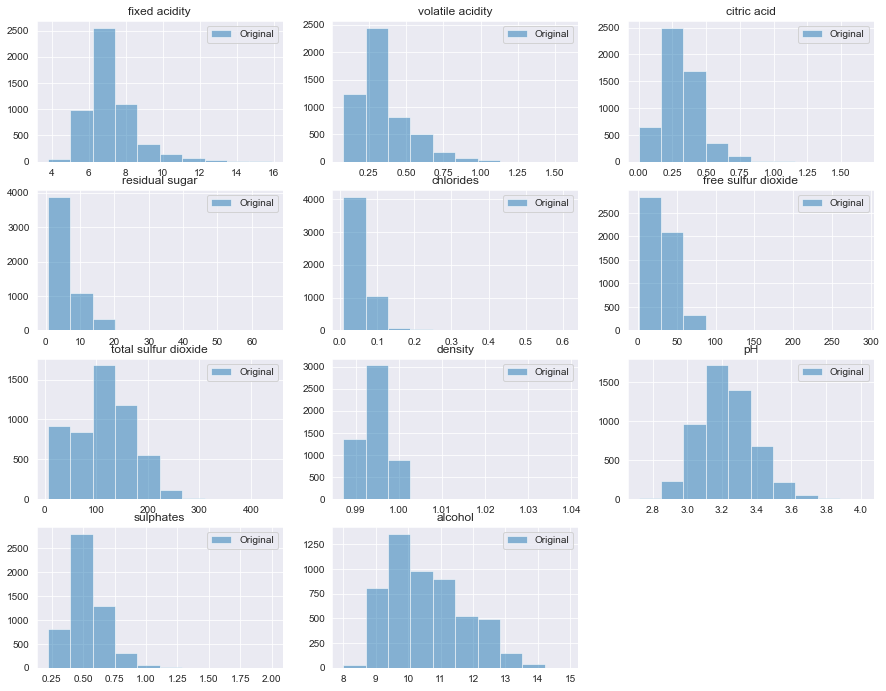

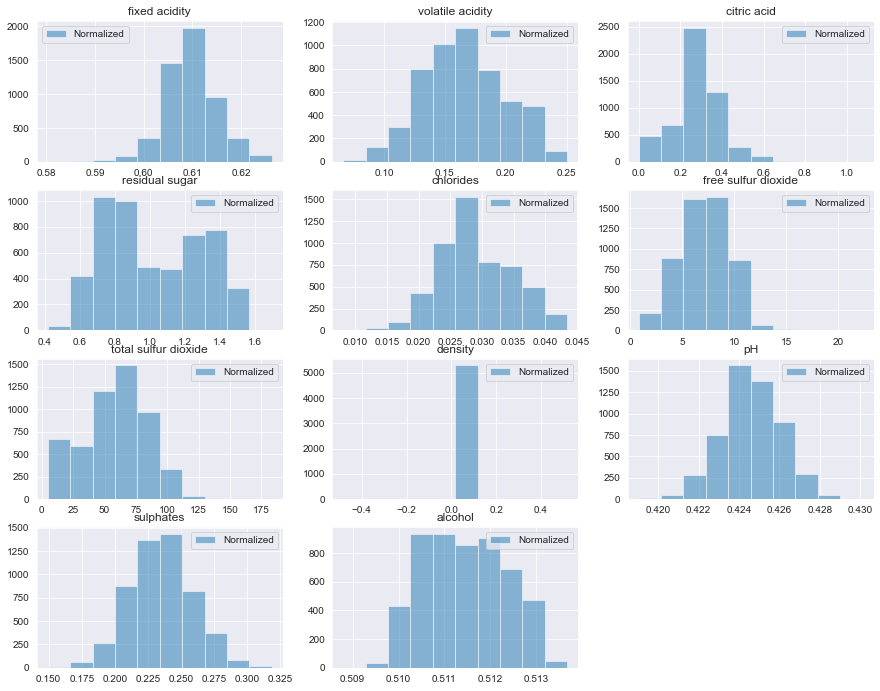

In [52]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Select the columns to normalize
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']

# Create a copy of the dataframe
wine_norm = wine.copy()

# Plot the original distributions
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(columns):
    wine[col].hist(ax=axes[i], label='Original', alpha=0.5)
    axes[i].set_title(col)
    axes[i].legend()

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])
# Apply the Box-Cox transformation to each column
for col in columns:
    wine_norm[col], _ = boxcox(wine_norm[col] + 1)

# Plot the normalized distributions
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(columns):
    wine_norm[col].hist(ax=axes[i], label='Normalized', alpha=0.5)
    axes[i].set_title(col)
    axes[i].legend()

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])
# Show the plots
plt.show()

In [53]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    4290
1    1005
Name: quality, dtype: int64

In [54]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0


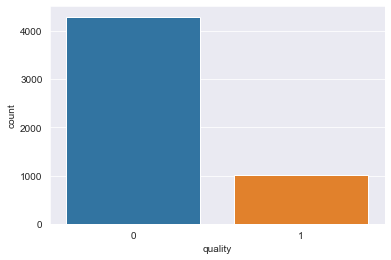

In [55]:
sns.countplot(wine['quality'])
plt.show()

## Scatter plot and Distributions

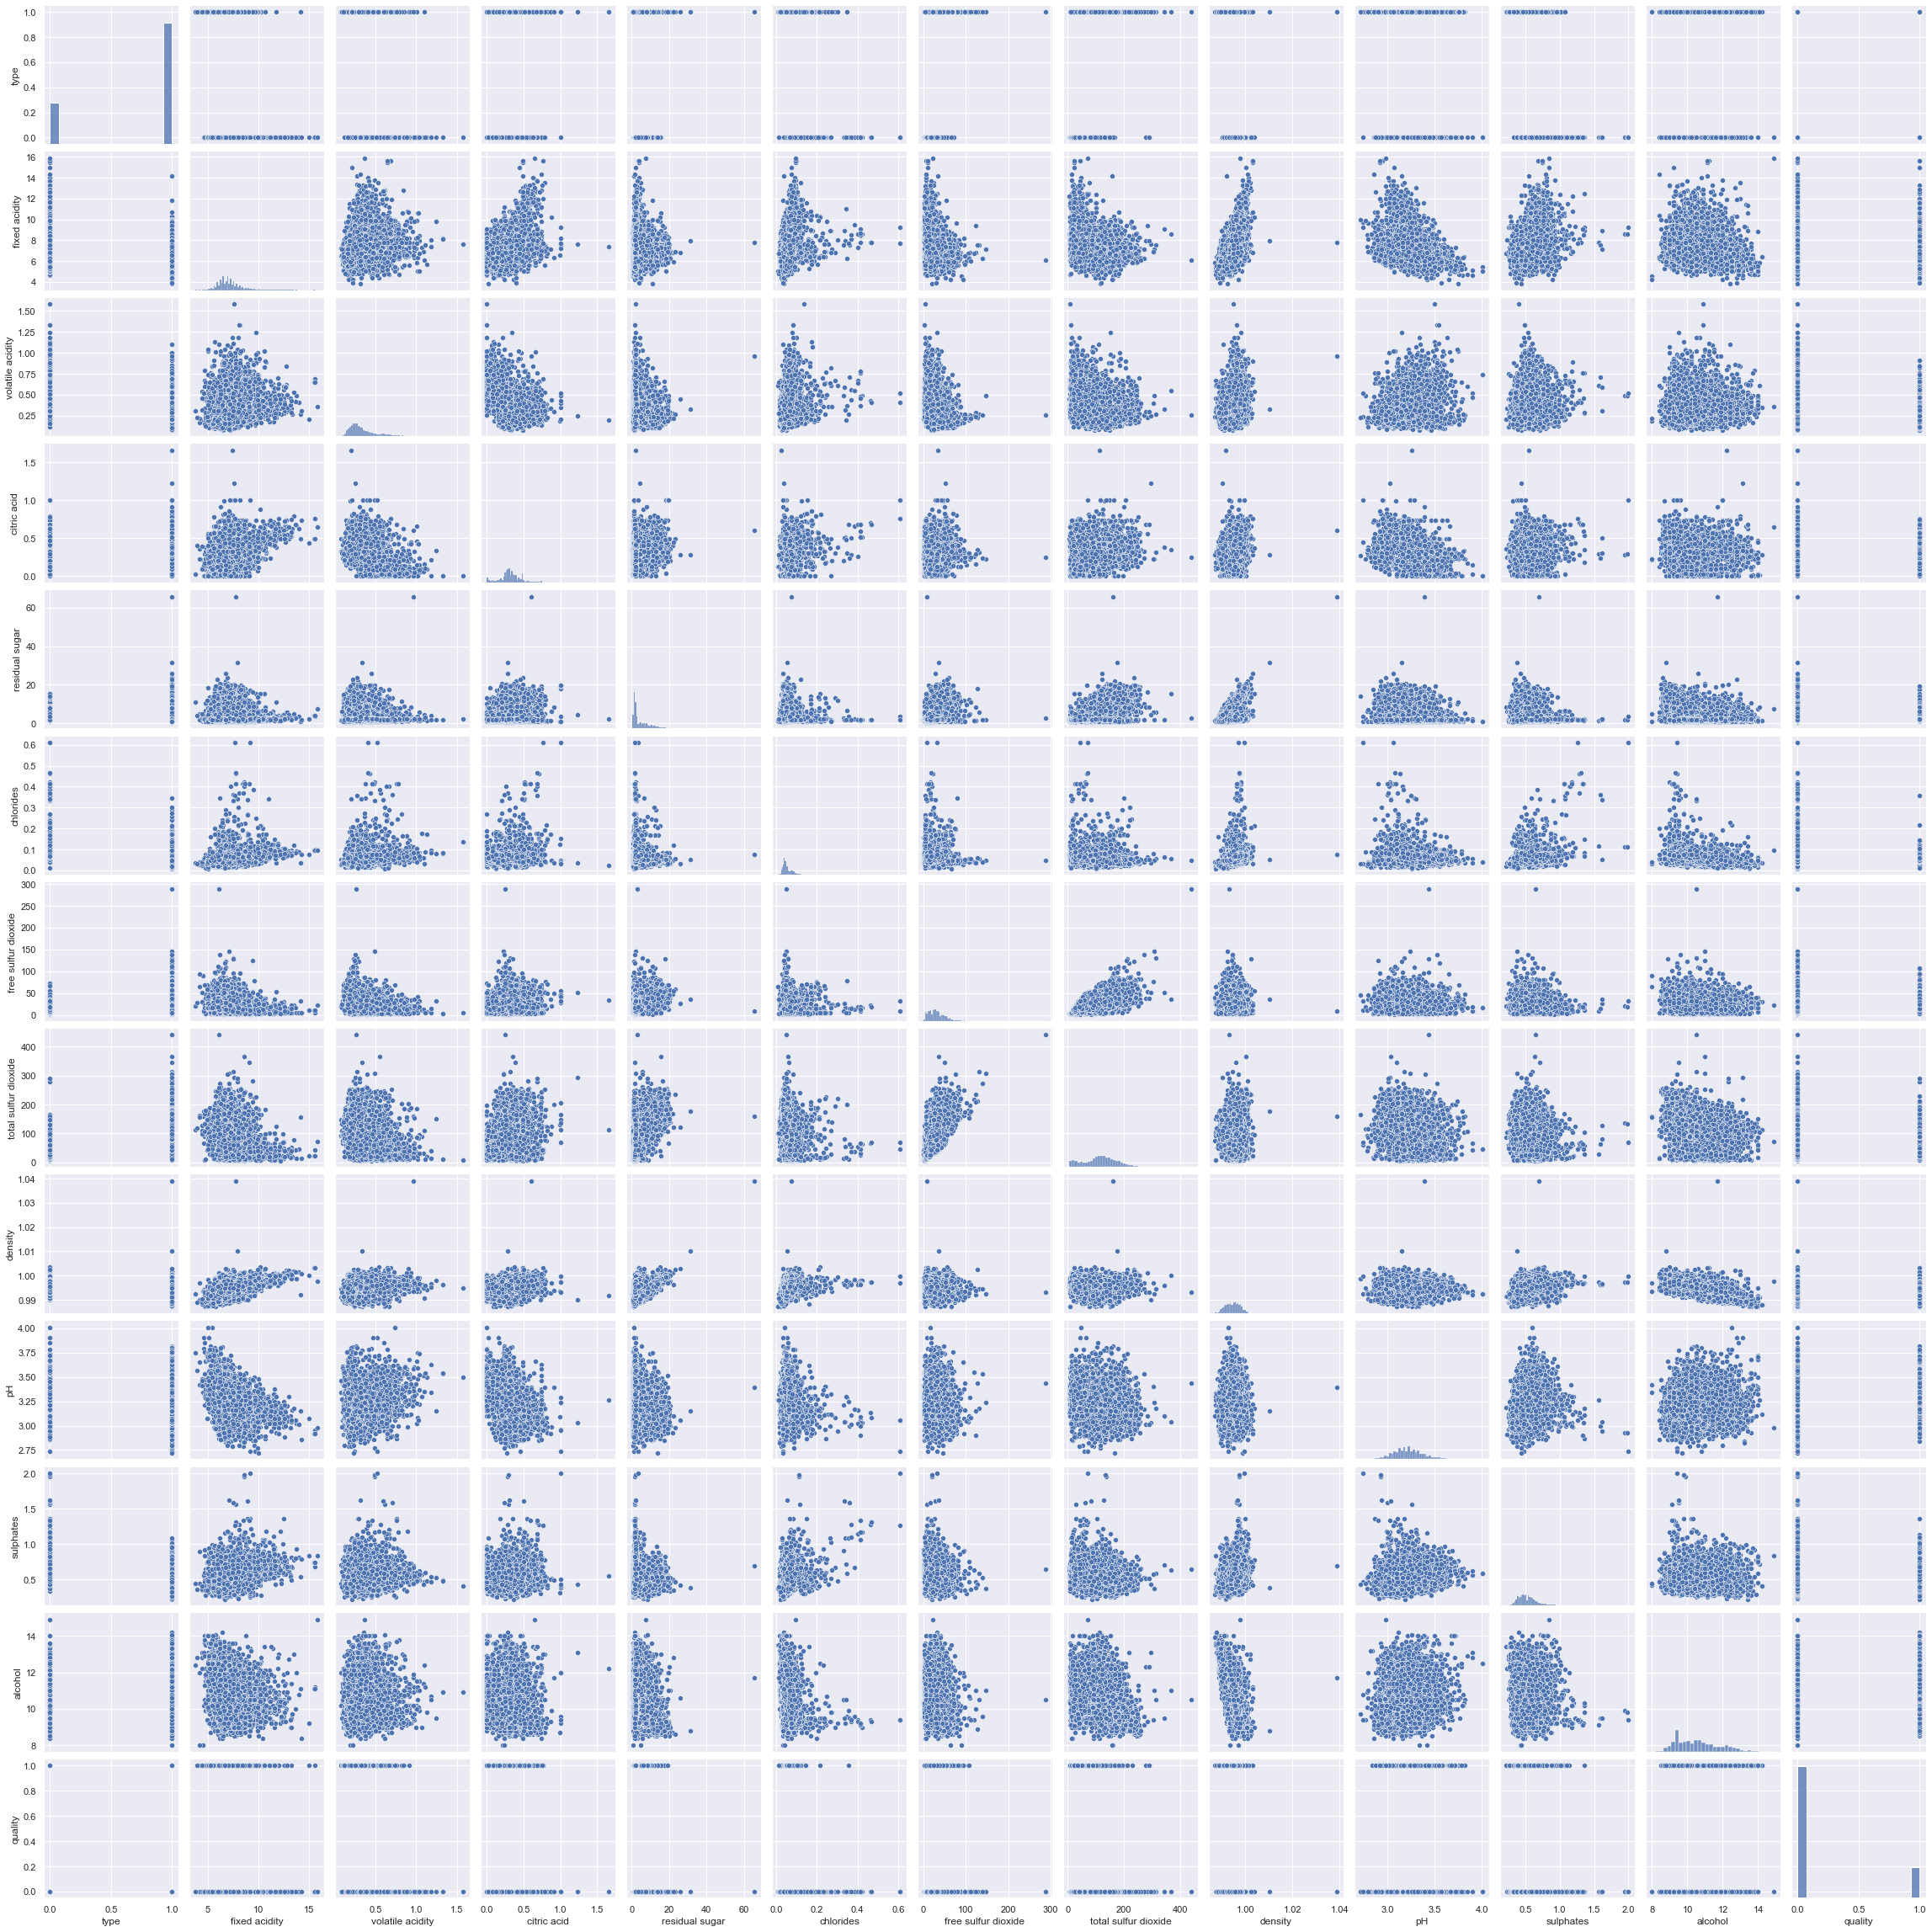

In [89]:
sns.set()
sns.pairplot(wine)
plt.figure(1 , figsize = (20,10))
plt.show()

## Correlation Matrix

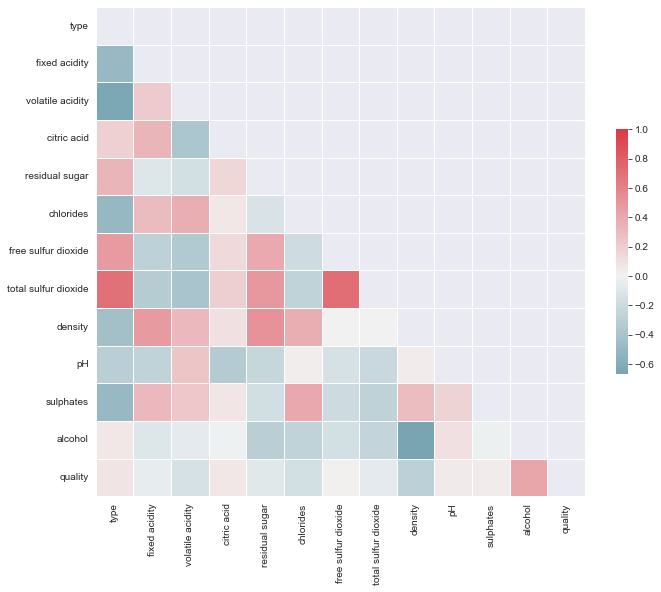

In [56]:
# Create correlation matrix
corr = wine.corr()

# Generate a mask the size of our correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show plot
plt.show()

# 4.Splitting the Data and Model training

In [84]:
def preprocess_and_compare(wine, num_samples):
    """
    Preprocess the data and compare the performance of several classifiers.
    
    Parameters:
    df (DataFrame): The original dataframe
    num_samples (int): The number of samples to be taken from the bad quality
    
    Returns:
    None
    """

    good = wine[wine.quality == 1]
    bad = wine[wine.quality == 0]

    #Randomly select the specified number of samples from the bad quality
    sampleOfbad = bad.sample(n = num_samples, random_state = 42)

    #Concatenate the sampled bad quality with the good qualitys to create the new dataframe
    newdf = pd.concat([sampleOfbad,good],axis = 0)

    # Split the data into features and labels
    X = newdf.iloc[:,:-1]
    Y = newdf.iloc[:,-1]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, shuffle=True, random_state=42)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    compare_models(X_train, X_test, y_train, y_test)
def compare_models(X_train, X_test, y_train, y_test):
    """
    Compare the performance of Random Forest, Decision Tree, Logistic Regression, SVM, and GaussianNB Classifiers.
    
    Parameters:
    X_train (ndarray): The training input samples.
    X_test (ndarray): The testing input samples.
    y_train (ndarray): The training target samples.
    y_test (ndarray): The testing target samples.
    
    Returns:
    None
    """

    models = {'Random Forest': RandomForestClassifier(n_estimators=100),
              'Decision Tree': DecisionTreeClassifier(),
              'Logistic Regression': LogisticRegression(),
              'SVM': SVC(),
              'GaussianNB': GaussianNB(),
              'XGBClassifier': XGBClassifier(),
              'StochasticGradientDecent Classifier': SGDClassifier(penalty=None)}
    results = []
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        results.append({'model': name, 'accuracy': accuracy})

        # Print the metrics
        print(f"{name} Accuracy: {accuracy:.3f}")
        print(f"{name} Precision: {precision:.3f}")
        print(f"{name} Recall: {recall:.3f}")
        print(f"{name} F1: {f1:.3f}")

        # Create the confusion matrix
        cm = metrics.confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix
        plt.figure()
        sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title(f'{name} Confusion Matrix')
        plt.show()
        
    # visualization for each model's accuracy
    plt.figure(figsize=(15,8))
    sns.barplot(x="model", y="accuracy", data=pd.DataFrame(results))
    plt.ylim(0, 1)
    plt.ylabel("Accuracy")
    plt.title("Models Accuracy Comparison")
    plt.show()
    highest_accuracy = max(results, key=lambda x: x['accuracy'])
    print(f"The model with the highest accuracy is {highest_accuracy['model']} with an accuracy of {highest_accuracy['accuracy']:.3f}")

    lowest_accuracy = min(results, key=lambda x: x['accuracy'])
    print(f"The model with the lowest accuracy is {lowest_accuracy['model']} with an accuracy of {lowest_accuracy['accuracy']:.3f}")

# 5.Test set predictions

Random Forest Accuracy: 0.776
Random Forest Precision: 0.762
Random Forest Recall: 0.800
Random Forest F1: 0.780


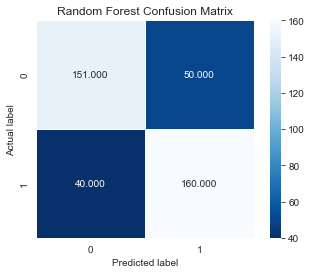

Decision Tree Accuracy: 0.678
Decision Tree Precision: 0.678
Decision Tree Recall: 0.675
Decision Tree F1: 0.677


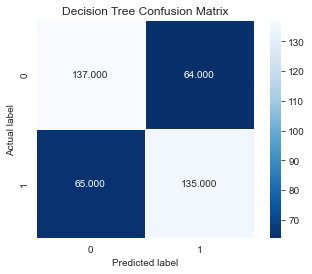

Logistic Regression Accuracy: 0.783
Logistic Regression Precision: 0.765
Logistic Regression Recall: 0.815
Logistic Regression F1: 0.789


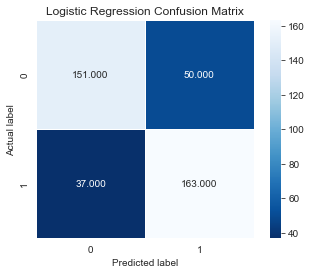

SVM Accuracy: 0.798
SVM Precision: 0.772
SVM Recall: 0.845
SVM F1: 0.807


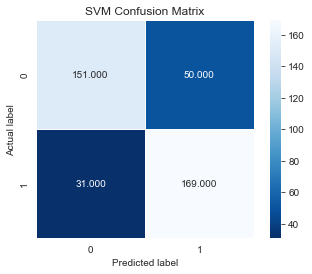

GaussianNB Accuracy: 0.738
GaussianNB Precision: 0.699
GaussianNB Recall: 0.835
GaussianNB F1: 0.761


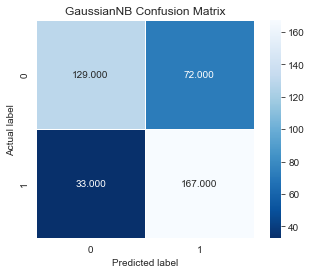

XGBClassifier Accuracy: 0.751
XGBClassifier Precision: 0.734
XGBClassifier Recall: 0.785
XGBClassifier F1: 0.758


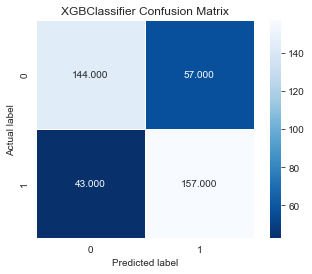

StochasticGradientDecent Classifier Accuracy: 0.771
StochasticGradientDecent Classifier Precision: 0.770
StochasticGradientDecent Classifier Recall: 0.770
StochasticGradientDecent Classifier F1: 0.770


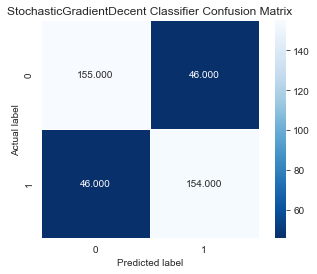

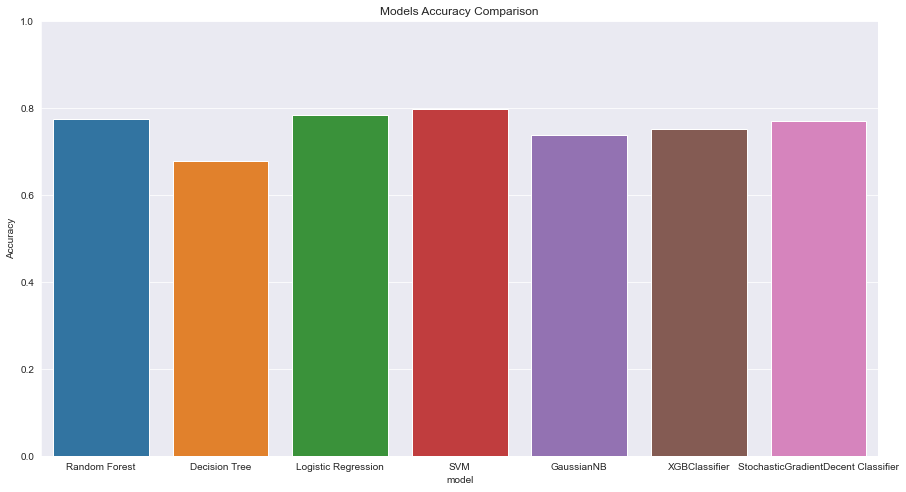

The model with the highest accuracy is SVM with an accuracy of 0.798
The model with the lowest accuracy is Decision Tree with an accuracy of 0.678


In [85]:
preprocess_and_compare(wine, 1000)

Random Forest Accuracy: 0.769
Random Forest Precision: 0.626
Random Forest Recall: 0.636
Random Forest F1: 0.631


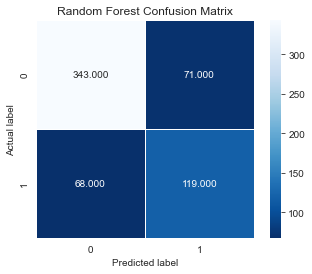

Decision Tree Accuracy: 0.704
Decision Tree Precision: 0.520
Decision Tree Recall: 0.620
Decision Tree F1: 0.566


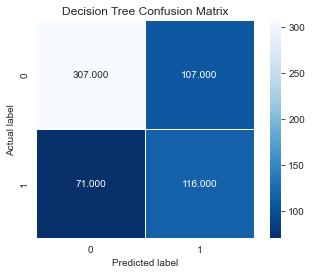

Logistic Regression Accuracy: 0.747
Logistic Regression Precision: 0.606
Logistic Regression Recall: 0.535
Logistic Regression F1: 0.568


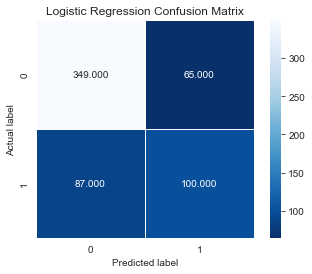

SVM Accuracy: 0.772
SVM Precision: 0.649
SVM Recall: 0.583
SVM F1: 0.614


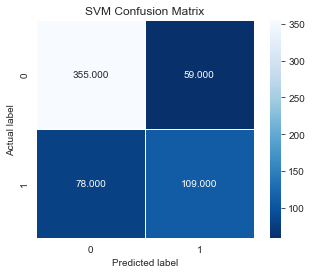

GaussianNB Accuracy: 0.709
GaussianNB Precision: 0.521
GaussianNB Recall: 0.781
GaussianNB F1: 0.625


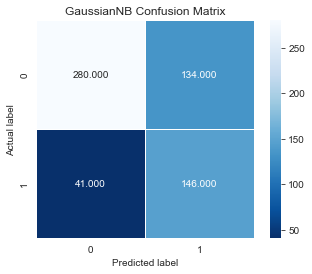

XGBClassifier Accuracy: 0.762
XGBClassifier Precision: 0.608
XGBClassifier Recall: 0.663
XGBClassifier F1: 0.634


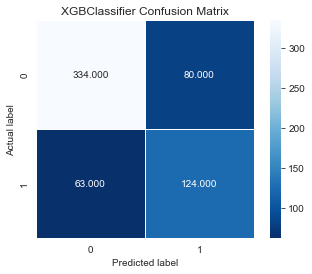

StochasticGradientDecent Classifier Accuracy: 0.727
StochasticGradientDecent Classifier Precision: 0.560
StochasticGradientDecent Classifier Recall: 0.572
StochasticGradientDecent Classifier F1: 0.566


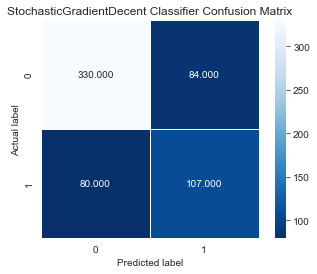

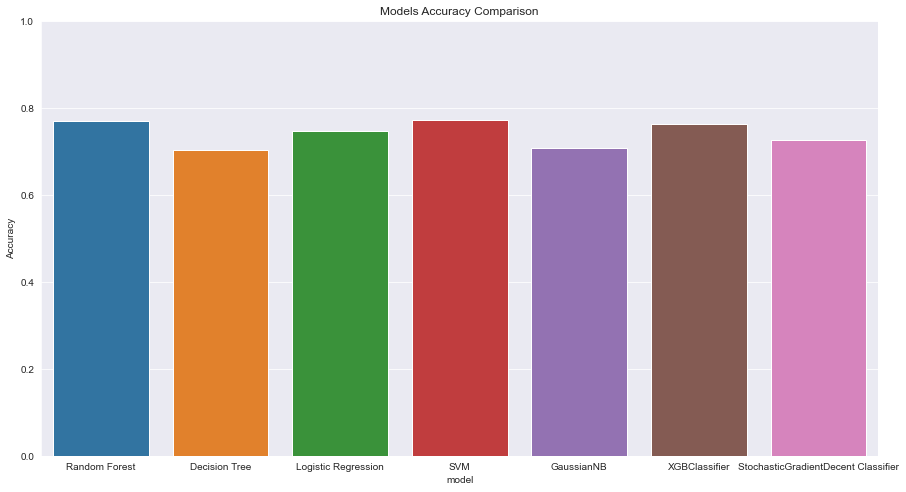

The model with the highest accuracy is SVM with an accuracy of 0.772
The model with the lowest accuracy is Decision Tree with an accuracy of 0.704


In [86]:
preprocess_and_compare(wine, 2000)

Random Forest Accuracy: 0.794
Random Forest Precision: 0.798
Random Forest Recall: 0.919
Random Forest F1: 0.854


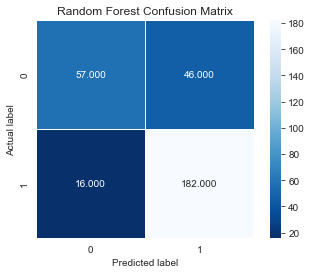

Decision Tree Accuracy: 0.668
Decision Tree Precision: 0.763
Decision Tree Recall: 0.717
Decision Tree F1: 0.740


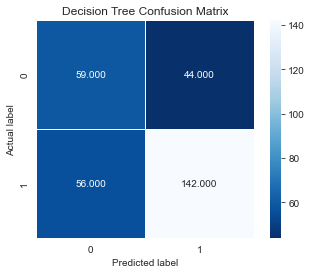

Logistic Regression Accuracy: 0.781
Logistic Regression Precision: 0.792
Logistic Regression Recall: 0.904
Logistic Regression F1: 0.844


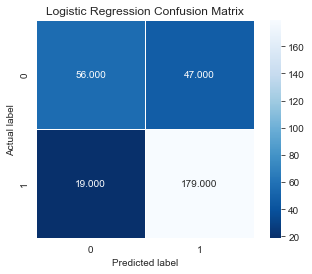

SVM Accuracy: 0.767
SVM Precision: 0.771
SVM Recall: 0.919
SVM F1: 0.839


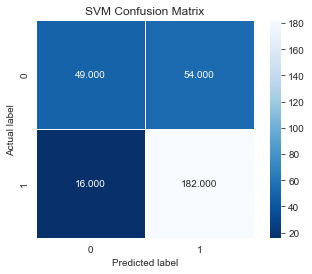

GaussianNB Accuracy: 0.714
GaussianNB Precision: 0.757
GaussianNB Recall: 0.833
GaussianNB F1: 0.793


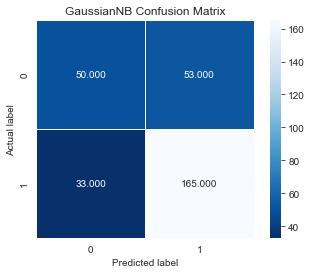

XGBClassifier Accuracy: 0.767
XGBClassifier Precision: 0.783
XGBClassifier Recall: 0.894
XGBClassifier F1: 0.835


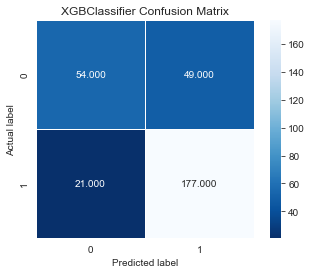

StochasticGradientDecent Classifier Accuracy: 0.764
StochasticGradientDecent Classifier Precision: 0.785
StochasticGradientDecent Classifier Recall: 0.884
StochasticGradientDecent Classifier F1: 0.831


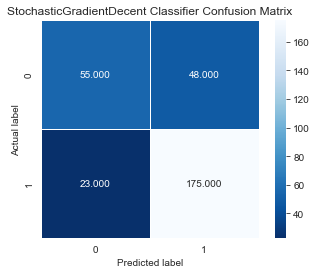

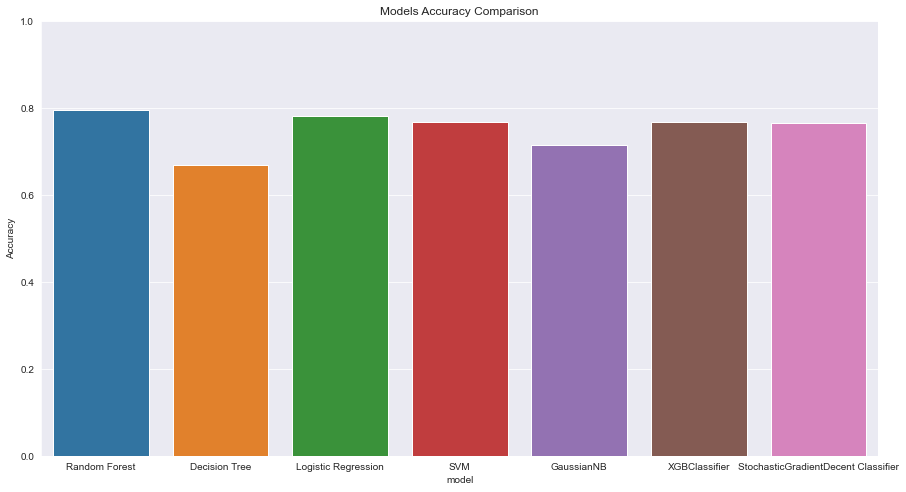

The model with the highest accuracy is Random Forest with an accuracy of 0.794
The model with the lowest accuracy is Decision Tree with an accuracy of 0.668


In [87]:
preprocess_and_compare(wine, 500)

## Feature Importances

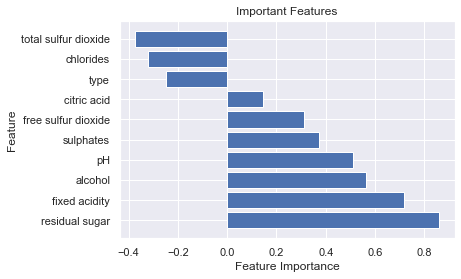

In [107]:
def plot_important_features(model, X, top_n=10):
    feature_importances = model.coef_[0]
    feature_names = X.columns
    feature_df = pd.DataFrame({"feature": feature_names, "importance": feature_importances})
    feature_df = feature_df.sort_values(by="importance", ascending=False)
    feature_df = feature_df.head(top_n)
    plt.barh(feature_df["feature"], feature_df["importance"])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Important Features")
    plt.show()
#call the function
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
plot_important_features(logreg, X, top_n=10)

# conclusion


while increase numbers of bad quality SVM has the highest accuracy ,so its better to use it,
and with low numbers of bad quaakity Random Forest has the highest accuracy,
The model with the lowest accuracy is Decision Tree in both casses 
while checking which variable has the important feature in Logestic Regression Model itt seems that residual sugar is the most important.